<a href="https://colab.research.google.com/github/onsoon829/dataproject/blob/master/410_%EC%A3%BC%EC%8B%9D%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주식분석 보고서 자동화 프로젝트


http://kind.krx.co.kr/corpgeneral/corpList.do?method=download 주식장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd  '/content/drive/MyDrive/ai_chat_python'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ai_chat_python


### 종목코드 가져오기
- 한국 거래소 종목코드 다운로드 : http://kind.krx.co.kr/corpgeneral/corpList.do?method=download

In [ ]:
import pandas as pd

def get_stock_code():

  # 종목코드 다운로드
  stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header = 0)[0]
  #print(stock_code)

  # 필요없는 column들은 제외
  stock_code = stock_code[['회사명','종목코드']]
  #print(stock_code)
  #print(stock_code.shape) # (2668, 2)

  # 한글컬럼명을 영어로 변경
  stock_code = stock_code.rename(columns={'회사명':'company', '종목코드':'code'})
  #print(stock_code.head(5))

  # 종목코드 여섯자리이기 때문에 6자리를 맞춰주기 위해 설정해준다.
  stock_code.code = stock_code.code.map('{:06d}'.format)
  # print(stock_code.head(5))
  return stock_code

In [ ]:
get_stock_code()

,company,code
0,AJ네트웍스,095570
1,BGF리테일,282330
2,BNK금융지주,138930
3,DSR,155660
4,HDC현대산업개발,294870
...,...,...
2663,카이바이오텍,446600
2664,코스텍시스템,169670
2665,타임기술,318660
2666,테크엔,308700


### 일별 시세 가져오기

In [ ]:
import pandas as pd
import requests

def get_stock(code):
  df = pd.DataFrame()
  for page in range(1,21):
    # 일별 시세 url
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)

    # mozilla뭐시기: f12 - network - ctrl+r - 스크롤 맨 밑에서 찾으면 있다.
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    #print(corrent_df.shape)
    #print(current_df)
    #The frame,append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
    df = df.append(current_df, ignore_index=True)
    #pd.concat([df.current_df])
    return df

In [ ]:
# 종목코드(삼성전자) 시세 출력
#get_stock('005930').shape
get_stock('005930').head(5)

https://finance.naver.com/item/sise_day.nhn?code=005930&page=1


<ipython-input-7-b9b5560ee45b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(current_df, ignore_index=True)


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.12.07,71500.0,200.0,71800.0,71900.0,71100.0,7300867.0
2,2023.12.06,71700.0,500.0,71800.0,72100.0,71600.0,8123087.0
3,2023.12.05,71200.0,1400.0,72300.0,72400.0,71200.0,12129682.0
4,2023.12.04,72600.0,600.0,72800.0,72900.0,72400.0,10229267.0


### 구현하기

(1) 종목 코드 및 일별 시세 가져오기

In [ ]:
import pandas as pd

def get_stock_code():

  # 종목코드 다운로드
  stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header = 0)[0]
  #print(stock_code)

  # 필요없는 column들은 제외
  stock_code = stock_code[['회사명','종목코드']]
    #print(stock_code.shape) # (2668, 2)

  # 한글컬럼명을 영어로 변경
  stock_code = stock_code.rename(columns={'회사명':'company', '종목코드':'code'})

  # 종목코드 여섯자리이기 때문에 6자리를 맞춰주기 위해 설정해준다.
  stock_code.code = stock_code.code.map('{:06d}'.format)

  return stock_code


def get_stock(code):
  df = pd.DataFrame()
  for page in range(1,21):
    # 일별 시세 url
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    url = '{url}&page={page}'.format(url=url, page=page)
    #print(url)

    # mozilla뭐시기: f12 - network - ctrl+r - 스크롤 맨 밑에서 찾으면 있다.
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    df = pd.concat([df, current_df], ignore_index =True)
  return df

def clean_data(df):
  #df.dropna()를 이용해 결측값 있는 행 제거
  df = df.dropna()

  # 한글로 된 걸럼명을 영어로 바꿔줌
  df = df.rename(columns = {'날짜':'date', '종가':'close', '전일비':'diff', '시가':'open', '고가': 'high', '저가':'low', '거래량':'volume'})
  # 데이터 타입을 int형으로 바꿔줌
  df[['close','diff','open','high','low','volume']] = df[['close','diff','open','high','low','volume']].astype(int)
  # 컬럼명 'date'의 타입을 date로 바꿔줌
  df['date'] = pd.to_datetime(df['date'])
  #일자(date)를 기준으로 오름차순 정렬
  #데이터 기준
  df = df.sort_values(by=['date'], ascending=True)
  return df


############################
## 함수 호출 ##
###########################
# 종목코드 가져오기
company = '삼성전자'
stock_code = get_stock_code()

# 일별 시세 가져오기
code = stock_code[stock_code.company==company].code.values[0].strip() # strip(): 공백제거
print(code)
df = get_stock(code)
print(df.shape)

df = clean_data(df)
print(df.shape)

005930
(300, 7)
(200, 7)


In [ ]:
1+2 = 3     = 정의한다.
1+2 == 3    == 같다


k=3
3=k

-------------

1+2 ? ???
5

1+2=5


------

5 ???  ??

5=1+2
1+2=5
5? 1+2

1+2??








SyntaxError: ignored

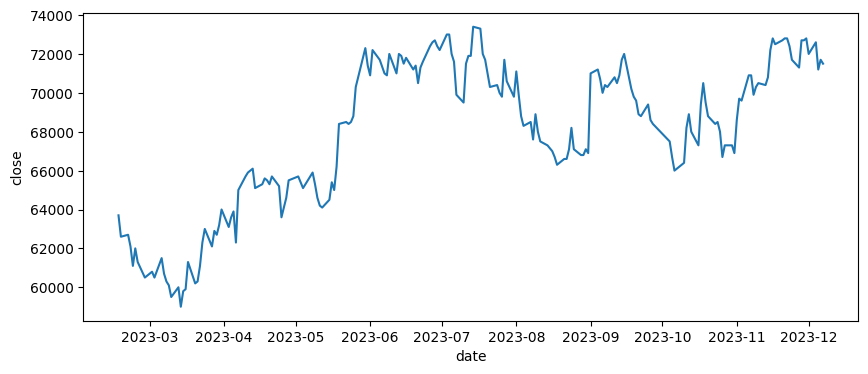

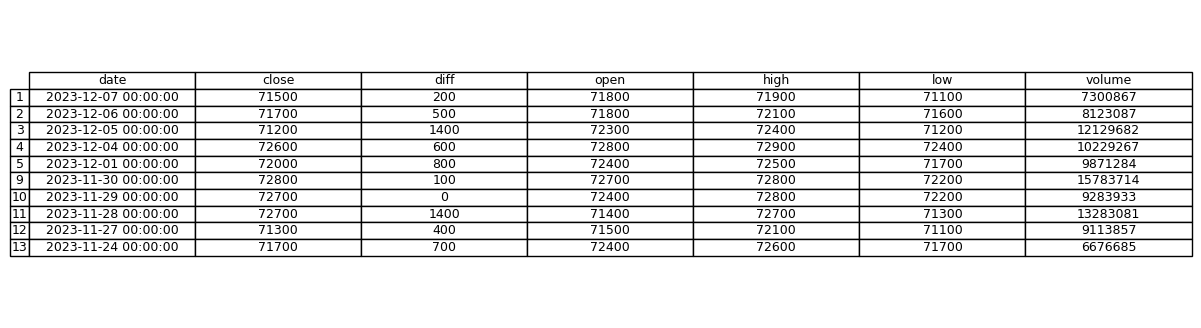

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import os

###########
#차트 그리기
##################
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('close')

######################
##차트 저장 및 출력하기
#######################
chart_fname = os.path.join('res/stock_report', '{company}_chart.png'.format(company=company))
plt.savefig(chart_fname)
plt.show()

#######################
# 일별 시세 그리기
#####################
plt.figure(figsize=(15,4))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)     #x축 숨기기
ax.yaxis.set_visible(False)     #y축 숨기기
df = df.sort_values(by=['date'], ascending=False) # 내림차순
table(ax, df.head(10), loc='center', cellLoc='center', rowLoc='center')

########################
# 일별 시세 저장하기
#######################
table_fname = os.path.join("res/stock_report", '{company}_table.png'.format(company=company))
plt.savefig(table_fname)

(3) 보고서 작성하기(ppt로)

In [ ]:
!pip install python-pptx

In [ ]:
import datetime
from pptx import Presentation
from pptx.util import Inches
import os

##############################
# 파워포인트 객체 선언
############################

today = datetime.datetime.today().strftime('%Y%m%d')
prs=Presentation() # 파워포인트 객체 선언

###############################
# 슬라이드 추가
#############################
title_slide_layout = prs.slide_layouts[0]  # 제목 슬라이드 생성
slide = prs.slides.add_slide(title_slide_layout)

# 제목 - 제목에 값 넣기
title = slide.shapes.title # 제목
title.text = '주식보고서'  # 제목에 값 넣기

# 부제목
subtitle = slide.placeholders[1] # 제목 상자는 placeholders[0], 부제목 상자는 [1]
subtitle.text = '보고서 작성일 : {date}'.format(date=today) # 부제목에 값 넣기 음음

#####################################
# 차트 및 테이블 슬라이드 추가
###################################
title_only_slide_layout = prs.slide_layouts[5] #제목만 있는 슬라이드
slide = prs.slides.add_slide(title_only_slide_layout)

shapes = slide.shapes # 상자나 이미지 타이틀 이런 걸로 접근 가능
shapes.title.text = '{company}, {close}원에 거래 마감'.format(company=company, close=df.iloc[0]['close'])
print(shapes.title.text)

#차트 추가
top = Inches(2)
left = Inches(0.5)
height = Inches(2.5)
width = Inches(9)
pic = slide.shapes.add_picture(chart_fname, left=left, top=top ,width=width, height=height)

# 테이블 추가
left = Inches(-1)
height = Inches(3)
width = Inches(12)
top = Inches(4)
pic = slide.shapes.add_picture(table_fname, left=left, top=top ,width=width, height=height)

cursor_sp = slide.shapes[0]._element
cursor_sp.addprevious(pic._element) # 해당 요소를 뒤로 보낸다.


##############################'
# 보고서 저장
####################################
ppt_fname = os.path.join('res/stock_report', 'stock_report.pptx')
prs.save(ppt_fname)

삼성전자, 71500원에 거래 마감


(4) 보고서를 메일로 전송하기

In [ ]:
import smtplib
# 이메일 메시지에 다양한 형식을 중첩하여 담기 위한 객체
from email.mime.multipart import MIMEMultipart

# 이메일 메시지를 이진 데이터로 바꿔주는 인코더
from email import encoders

# 텍스트 형식
from email.mime.text import MIMEText
# 이미지 형식
from email.mime.image import MIMEImage
# 오디오 형식
from email.mime.audio import MIMEAudio

# 위의 모든 객체들을 생성할 수 있는 기본 객체
# MIMEBase(_maintype, _subtype)
# MIMEBase(<메인 타입>, <서브 타입>)
from email.mime.base import MIMEBase

##############################
## 함수 정의
###################################
def send_email(smtp_info, msg):
  with smtplib.SMTP(smtp_info['smtp_server'], smtp_info['smtp_port']) as server:
    #TLS 보안 연결
    server.starttls()
    #로그인
    server.login(smtp_info['smtp_user_id'], smtp_info['smtp_user_pw'])

    #로그인 된 서버에 이메일 전송
                #메시지를 보낼때는 as_string()메소드를 사용해서 문자열로 바꿔준다.
    response = server.sendmail(msg['From'], msg['To'], msg.as_string())


    #이메일을 성공적으로 보내면 결과는{}
    if not response:
      print('이메일을 성공적으로 보냈습니다.')
    else:
      print(response)


def make_multimsg(msg_dict):
  multi = MIMEMultipart(_subtype='mixed')

  for key, value in msg_dict.items():
    # 각 타입에 적절한 MIMExxx()함수를 호출하여 msg객체를 형성한다.

    if key == 'text':
       with open(value['filename'], encoding='utf-8') as fp:
          msg = MIMEText(fp.read(), _subtype=value['subtype'])
    elif key == 'image':
       with open(value['filename'], 'rb') as fp:
          msg = MIMEImage(fp.read(), _subtype=value['subtype'])
    elif key == 'audio':
       with open(value['filename'], 'rb') as fp:
          msg = MIMEAudio(fp.read(), _subtype=value['subtype'])
    else:
       with open(value['filename'], 'rb') as fp:
          msg = MIMEBase(value['maintype'], _subtype=value['subtype'])
          msg.set_payload(fp.read())
          encoders.encode_base64(msg)

    # 경로가 있는 경우, 파일의 이름만 추출 ex) res/stock_report/stock_report.pptx -> stock_report.pptx
    _, fname = os.path.split(value['filename'])
    print(fname)
    # 파일 이름을 첨부파일 제목으로 추가.
    msg.add_header('Content-Disposition', 'attachment', filename = fname) # - 와 _ 구분 조심하자. 정말 열받는구만


    # 첨부파일 추가
    multi.attach(msg)
  return multi



##############################
## 함수 호출
###################################
# smtp_info = dict({"smtp_server" : "smtp.naver.com", # SMTP 서버 주소
#                   "smtp_user_id" : "<송신자(sender) 메일 계정>@naver.com",
#                   "smtp_user_pw" : "<송신자(sender) 메일 패스워드>",
#                   "smtp_port" : 587}) # SMTP 서버 포트

smtp_info = dict({"smtp_server" : "smtp.naver.com", # SMTP 서버 주소
                  "smtp_user_id" : "onsoon829@naver.com",
                  "smtp_user_pw" : "",
                  "smtp_port" : 587}) # SMTP 서버 포트

msg_dict = {
    'application' : {'maintype' : 'application', 'subtype' : 'octect-stream', 'filename' : 'res/stock_report/stock_report.pptx'} # 그외 첨부파일
}

# 메일 내용 작성
title = '{date}. 주식 보고서 분석 자료 입니다.'.format(date=today)
content = '주식 보고서 분석 자료입니다.'
sender = smtp_info['smtp_user_id']
receiver = 'onsoon431@daum.net'

msg = MIMEText(_text = content, _charset='utf-8')

# 첨부파일 추가
msg_dict['application']['filename'] = ppt_fname
multi = make_multimsg(msg_dict)
multi['Subject'] = title
multi['From'] = sender
multi['To'] = receiver
multi.attach(msg)

send_email(smtp_info, multi)

stock_report.pptx
이메일을 성공적으로 보냈습니다.
